
  # Project 2 - Ames Housing Data and Kaggle Challenge

In this notebook, i will clean the data and do my exploratory data analysis.

## Data Import
### Importing Relevant Libraries

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

#scikit 
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

#warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

### Importing Datasets

In [2]:
sample_sr = pd.read_csv('./datasets/sample_sub_reg.csv')
test = pd.read_csv('./datasets/test.csv')
train = pd.read_csv('./datasets/train.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
train.shape

(2051, 81)

In [6]:
test.shape

(878, 80)

In [7]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

## EDA and Data Cleaning

### Sale Price Distribution
First let's look at the distribution for Sale Prices of homes

<Figure size 864x720 with 0 Axes>

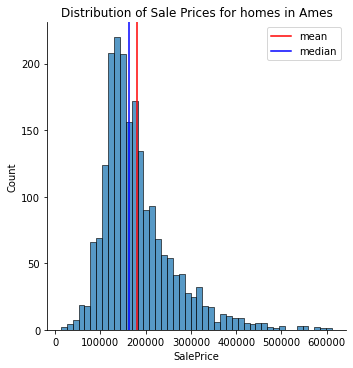

In [8]:
plt.figure(figsize=(12,10))
sns.displot(train['SalePrice'])
plt.ylabel('Count')
plt.title('Distribution of Sale Prices for homes in Ames')
plt.axvline(train['SalePrice'].mean(), color='r', label='mean')
plt.axvline(train['SalePrice'].median(), color='b', label='median')
plt.legend()

SalePrice have a postively skewed distribution with multiple outliers. I will now remove  remove the outliers  in the range (<30000) and (>600000). I will also need to standardise it to create a better model.

In [9]:
train[train['SalePrice'] <30000].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,...,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
1628,182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,12789


In [10]:
train[train['SalePrice'] > 600000].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1671,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,New,611657


In [11]:
train = train.drop(labels = [183, 1628, 1671], axis=0)

In [12]:
print("SalePrice Mean:", train['SalePrice'].mean())
print("SalePrice Median:", train['SalePrice'].median())

SalePrice Mean: 181424.224609375
SalePrice Median: 162500.0


#### Applying log to SalePrice

<Figure size 864x720 with 0 Axes>

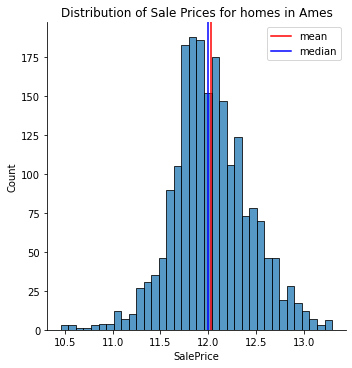

In [13]:
plt.figure(figsize=(12,10))
sns.displot(np.log(train['SalePrice']))
plt.ylabel('Count')
plt.title('Distribution of Sale Prices for homes in Ames')
plt.axvline(np.log(train['SalePrice']).mean(), color='r', label='mean')
plt.axvline(np.log(train['SalePrice']).median(), color='b', label='median')
plt.legend()

With log applied, the model is transformed to a more normalized dataset and improves the fit of the model.

### Check for Missing Values

In [14]:
print(f'Missing values in train dataset: {train.isnull().sum().sum()}')
print(f'Missing values in test dataset: {test.isnull().sum().sum()}')


Missing values in train dataset: 9804
Missing values in test dataset: 4171


There seems to be quite a lot of missing values in both datasets. I will address this issue in the following parts.

Text(0, 0.5, 'Feature of Missing Value')

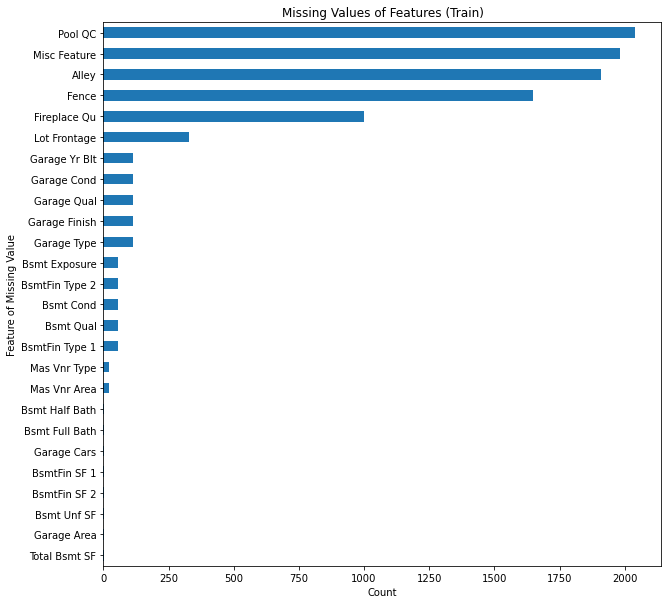

In [15]:
misval = train.isnull().sum()[train.isnull().sum()>0]
misval.sort_values().plot(kind='barh', figsize=(10,10))
plt.title('Missing Values of Features (Train)')
plt.xlabel('Count')
plt.ylabel('Feature of Missing Value')

Text(0, 0.5, 'Feature of Missing Value')

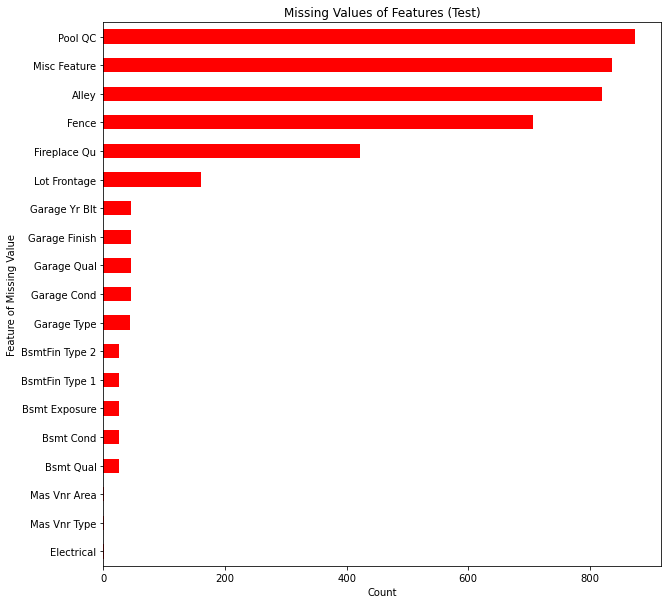

In [16]:
misval2 = test.isnull().sum()[test.isnull().sum()>0]
misval2.sort_values().plot(kind='barh', figsize=(10,10), color='r')
plt.title('Missing Values of Features (Test)')
plt.xlabel('Count')
plt.ylabel('Feature of Missing Value')

### Impute Reasonable Values into Missing Values
I will now impute some of the missing values with reasonable inputs to and filter out the predictors to get a more accurate model. I will first compare them with the target SalePrice to see if they are useful in contributing to my model. I will also split the features into categorical and numerical features.

#### Correlation to Sales Price Box Plot - Categorical Features

Firstly, i will create a boxplot showing the correlation between categorical variables to the target Sales Price. From there, we can see what are the variables that are greating affecting the price of a home.

In [17]:
# Creating boxplot function

def subplot_boxplot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    ax = ax.ravel() 
    if len(list_of_columns) %2 !=0:
        ax[len(list_of_columns)].set_visible(False)
    for i, column in enumerate(list_of_columns):
        names = train.groupby(column).mean()['SalePrice'].sort_values().index
        sns.boxplot(dataframe[column],dataframe['SalePrice'],order = names, ax = ax[i]) 
        ax[i].set_title(f' " SalePrice" vs "{column}"', fontsize =18)
        ax[i].set_ylabel('Values',fontsize=15)
        ax[i].set_xlabel(column,fontsize=15) 
        ax[i].set_xticklabels(names,rotation=40) 
    plt.tight_layout()


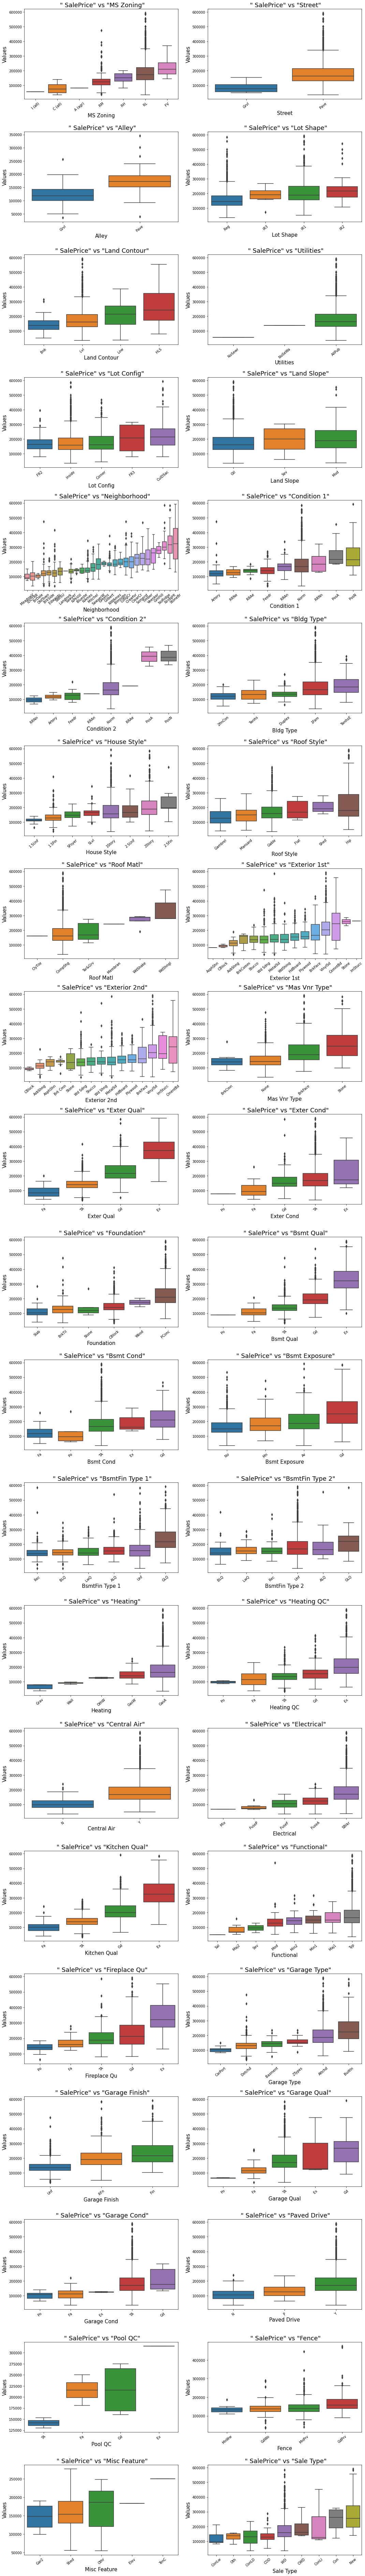

In [18]:
cat_features = train.select_dtypes(include = 'object').columns
subplot_boxplot(train, cat_features)

As we can see from the boxplots, the features Lot Config, Land Slope, Utilities, Fence and Misc Features have no linear relationship with Sales Price. Hence, they will be removed. On the other hand, zoning, neighbourhood and quality features like exterior and kitchen have significant linear relationship with the Sale Price 

In [19]:
train = train.drop(['Lot Config', 'Land Slope', 'Utilities', 'Fence', 'Misc Feature'], axis=1)

In [20]:
test = test.drop(['Lot Config', 'Land Slope', 'Utilities', 'Fence', 'Misc Feature'], axis=1)

#### Correlation to Sales Price Heat Map - Numerical Features

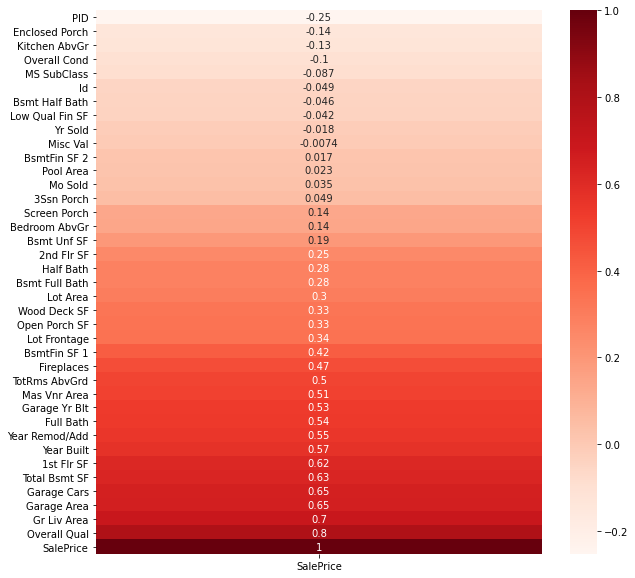

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), annot=True, cmap='Reds');

In this heatmap, we can see that overall quality, ground living area and garage area have the greatest positive correlation with sale price. On the other hand, features like enclosed porch and above round kitchen have a mild negative correlation with sale price. I will now go on to analyse the features with visualisations.

### Visualisation of high correlation features with sale price

In [22]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800597
Gr Liv Area        0.697271
Garage Area        0.654461
Garage Cars        0.651163
Total Bsmt SF      0.626183
1st Flr SF         0.615934
Year Built         0.572255
Year Remod/Add     0.550603
Full Bath          0.539204
Garage Yr Blt      0.533404
Mas Vnr Area       0.507615
TotRms AbvGrd      0.499844
Fireplaces         0.470089
BsmtFin SF 1       0.417072
Lot Frontage       0.342050
Open Porch SF      0.334472
Wood Deck SF       0.330152
Lot Area           0.298943
Bsmt Full Bath     0.281896
Half Bath          0.280974
2nd Flr SF         0.251377
Bsmt Unf SF        0.193629
Bedroom AbvGr      0.139070
Screen Porch       0.136038
3Ssn Porch         0.049256
Mo Sold            0.034523
Pool Area          0.023363
BsmtFin SF 2       0.016580
Misc Val          -0.007393
Yr Sold           -0.017950
Low Qual Fin SF   -0.041928
Bsmt Half Bath    -0.045616
Id                -0.048929
MS SubClass       -0.087462
Overall Cond      -0

#### Overall Quality vs Sales Price

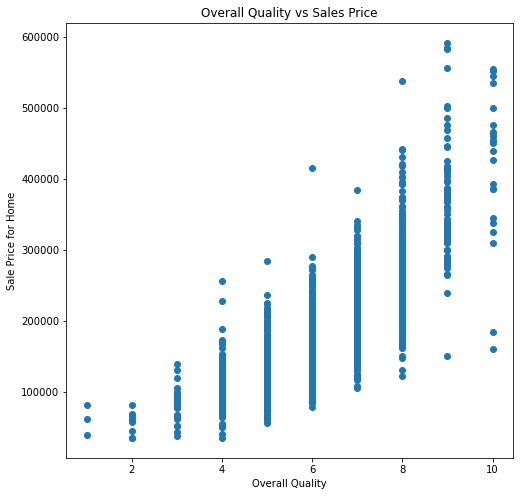

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(x=train['Overall Qual'], y=train['SalePrice'])
plt.title('Overall Quality vs Sales Price')
plt.xlabel('Overall Quality')
plt.ylabel("Sale Price for Home")
plt.show()

The greater the overall quality of a home, the higher the sale price.

#### Greater Living Area vs Sales Price

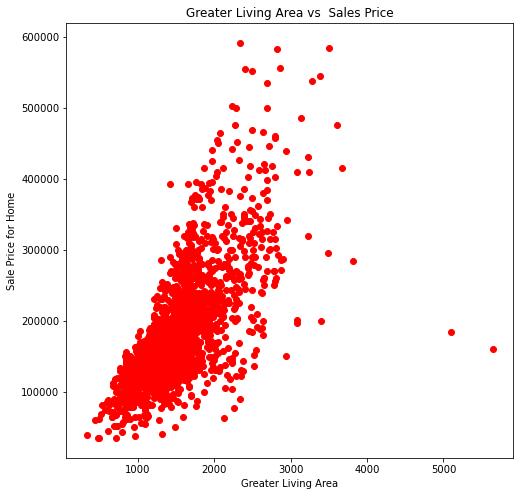

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(x=train['Gr Liv Area'], y=train['SalePrice'], color='r')
plt.title('Greater Living Area vs  Sales Price')
plt.xlabel('Greater Living Area')
plt.ylabel("Sale Price for Home")
plt.show()

A greater living area leads to a higher sale price. There are 2 outliers which i will proceed to remove.

#### Removing Outliers in Gr Liv Area

In [25]:
train = train.drop(train[train['Gr Liv Area'] > 4000].index)

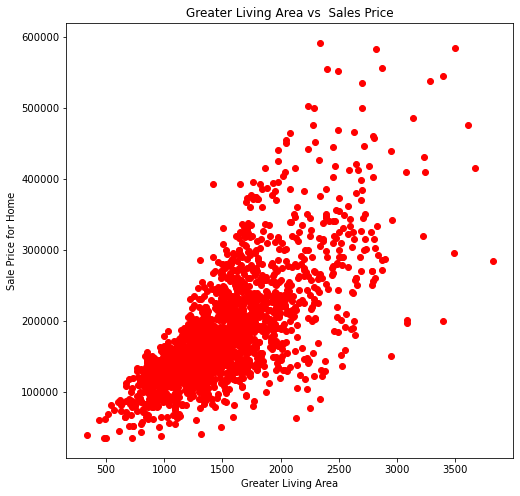

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(x=train['Gr Liv Area'], y=train['SalePrice'], color='r')
plt.title('Greater Living Area vs  Sales Price')
plt.xlabel('Greater Living Area')
plt.ylabel("Sale Price for Home")
plt.show()

#### Garage Area vs Sales Price

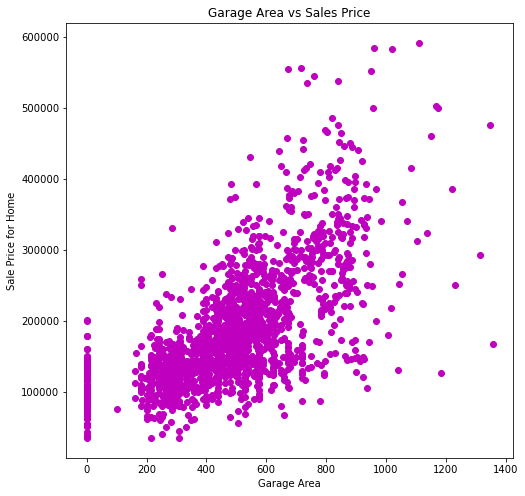

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(x=train['Garage Area'], y=train['SalePrice'], color='m')
plt.title('Garage Area vs Sales Price')
plt.xlabel('Garage Area')
plt.ylabel("Sale Price for Home")
plt.show()

Having a greater garage areas also increase the sale price of a home.

#### First Floor Area vs Sales Price

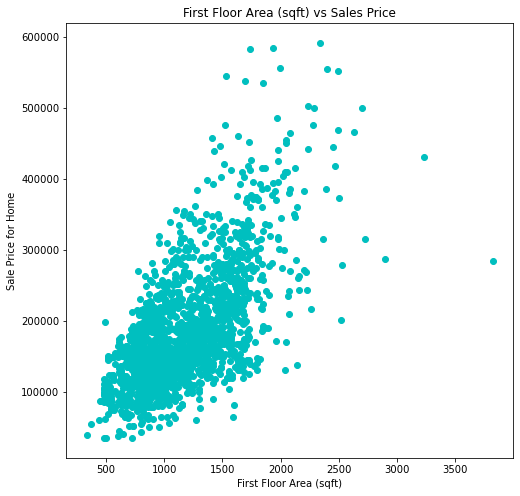

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(x=train['1st Flr SF'], y=train['SalePrice'], color='c')
plt.title('First Floor Area (sqft) vs Sales Price')
plt.xlabel('First Floor Area (sqft)')
plt.ylabel("Sale Price for Home")
plt.show()

Greater first floor area increases a price of a home

#### Year Built vs Sales Price

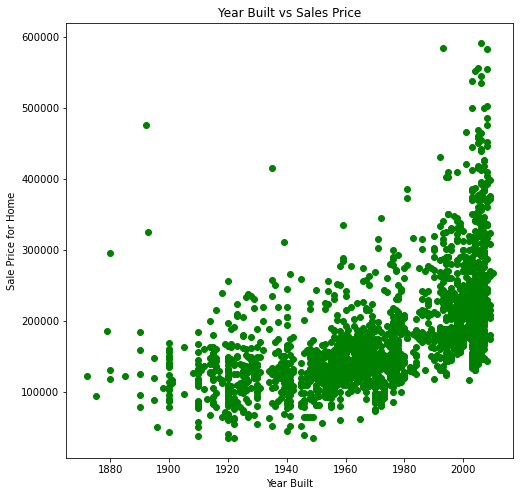

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(x=train['Year Built'], y=train['SalePrice'], color='g')
plt.title('Year Built vs Sales Price')
plt.xlabel('Year Built')
plt.ylabel("Sale Price for Home")
plt.show()

The newer the home, the greater the price.

### Removing Irrelevant Columns

In this section, i will be addressing the missing values and removing the irrelevant columns which do not really contribute to a home price.

In [30]:
misval.sort_values(ascending=False).head()

Pool QC         2039
Misc Feature    1983
Alley           1908
Fence           1648
Fireplace Qu     999
dtype: int64

In [31]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Are

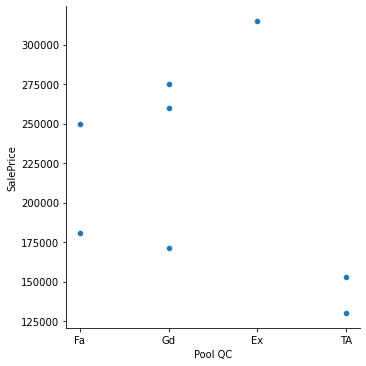

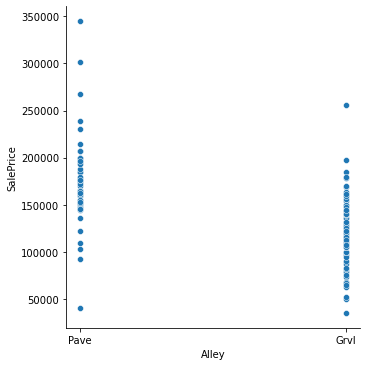

In [32]:
# Stack overflow - https://stackoverflow.com/questions/64387789/sns-pairplot-variable-grlivarea-output-is-blank
sns.relplot(x='Pool QC', y='SalePrice', data=train)
sns.relplot(x='Alley',y='SalePrice', data=train)
plt.show()


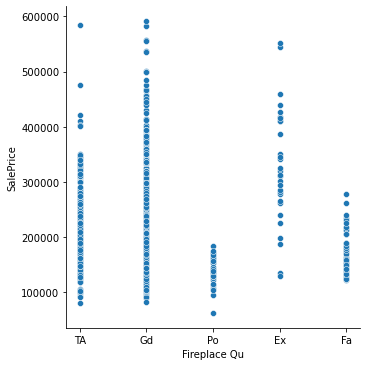

In [33]:
sns.relplot(x='Fireplace Qu', y='SalePrice', data=train)

Based on the above visualisations, this variables have huge number of missing values and a weak correlation with sale price. Furthermore, the Pool QC plot tells us that many homes are without a pool. Hence i will remove them.

In [34]:
train = train.drop(columns=['Pool QC', 'Alley', 'Fireplace Qu'])
test = test.drop(columns=['Pool QC', 'Alley', 'Fireplace Qu'])

I will also remove Id and PID as they are irrelevant to sales price

In [35]:
train = train.drop(columns=['Id', 'PID'])
test = test.drop(columns=['Id', 'PID'])

### Checking out the relationship between Lot Frontage and Lot Area
#### Lot Frontage
As lot area has a positively and significant correlation with sales price, i feel it is worth looking into the missing values of lot frontage.

In [36]:
train['Lot Frontage'].isnull().sum()

330

Text(0.5, 1.0, 'Relationship between Lot Frontage and Lot Area')

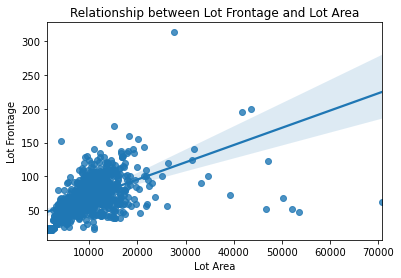

In [37]:
#train['Lot Frontage'] = train['Lot Frontage'].apply(float)
#test['Lot Frontage'] = test['Lot Frontage'].apply(float)
#misval2 = test.isnull().sum()[test.isnull().sum()>0]
lotval = train['Lot Frontage'].isnull() == False
la = train[lotval]['Lot Area']
lf = train[lotval]['Lot Frontage']
ax = sns.regplot(x=la, y=lf)
ax.set_title('Relationship between Lot Frontage and Lot Area')

As seen above, there is a linear relationship between the size of Lot Frontage and Lot Area.

#### Get Rid of Outlier

In [38]:
train[train['Lot Area'] > 60000].head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Neighborhood,Condition 1,Condition 2,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,50,RL,NaN,159000,Pave,IR2,Low,ClearCr,Norm,Norm,...,98,0,0,0,0,500,6,2007,WD,277000
694,20,RL,NaN,115149,Pave,IR2,Low,ClearCr,Norm,Norm,...,48,0,0,0,0,0,6,2007,WD,302000
1854,20,RL,62.0,70761,Pave,IR1,Low,ClearCr,Norm,Norm,...,54,0,0,0,0,0,12,2006,WD,280000


In [39]:
train[train['Lot Frontage'] > 250].head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Neighborhood,Condition 1,Condition 2,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1335,20,RL,313.0,27650,Pave,IR2,HLS,NAmes,PosA,Norm,...,0,0,0,0,0,0,11,2008,WD,242000


In [40]:
train = train.drop(labels = [471, 694, 1854, 1335], axis=0)

Text(0.5, 1.0, 'Relationship between Lot Frontage and Lot Area')

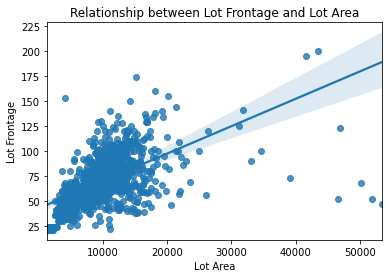

In [41]:
lotval = train['Lot Frontage'].isnull() == False
la = train[lotval]['Lot Area']
lf = train[lotval]['Lot Frontage']
ax = sns.regplot(x=la, y=lf)
ax.set_title('Relationship between Lot Frontage and Lot Area')

Since there is a linear relationship between Lot Area and Lot Frontage, i will impute the missing values in Lot frontage according to the regression equation.

In [42]:
slope_intercept = np.polyfit(la, lf,1)

print(slope_intercept)

[2.73215311e-03 4.26993303e+01]


In [43]:
# Update Lot Frontage values according to linear regression model
train['Lot Frontage'] = train.apply(lambda row: round(row['Lot Area']*0.00273 + 42.699,1) if np.isnan(row['Lot Frontage']) else row['Lot Frontage'], axis=1)

I'll do same for the test set

Text(0.5, 1.0, 'Relationship between Lot Frontage and Lot Area')

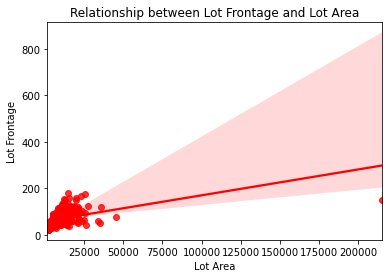

In [44]:
lotval2 = test['Lot Frontage'].isnull() == False
la2 = test[lotval2]['Lot Area']
lf2 = test[lotval2]['Lot Frontage']
ax = sns.regplot(x=la2, y=lf2, color='r')
ax.set_title('Relationship between Lot Frontage and Lot Area')

In [45]:
test[test['Lot Area'] > 40000].head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Neighborhood,Condition 1,Condition 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
213,20,RL,150.0,215245,Pave,IR3,Low,Timber,Norm,Norm,...,0,0,0,0,0,0,0,6,2009,WD
306,190,RL,NaN,164660,Grvl,IR1,HLS,Timber,Norm,Norm,...,670,0,0,0,0,0,700,8,2008,WD
522,70,I (all),NaN,56600,Pave,IR1,Low,IDOTRR,Norm,Norm,...,0,0,0,0,0,0,0,1,2008,WD
715,50,RL,75.0,45600,Pave,IR2,Bnk,ClearCr,Norm,Norm,...,486,40,0,0,175,0,0,9,2008,WD


In [46]:
test = test.drop(labels = [213, 306, 522,715], axis=0)

Text(0.5, 1.0, 'Relationship between Lot Frontage and Lot Area')

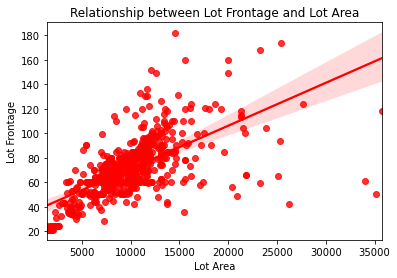

In [47]:
lotval2 = test['Lot Frontage'].isnull() == False
la2 = test[lotval2]['Lot Area']
lf2 = test[lotval2]['Lot Frontage']
ax = sns.regplot(x=la2, y=lf2, color='r')
ax.set_title('Relationship between Lot Frontage and Lot Area')

In [48]:
slope_intercept = np.polyfit(la2, lf2,1)

print(slope_intercept)

[3.50800647e-03 3.59634028e+01]


In [49]:
# Update Lot Frontage values according to linear regression model
test['Lot Frontage'] = test.apply(lambda row: round(row['Lot Area']*0.00351 + 35.963,1) if np.isnan(row['Lot Frontage']) else row['Lot Frontage'], axis=1)

In [50]:
print(f'Missing values in train dataset: {train.isnull().sum().sum()}')
print(f'Missing values in test dataset: {test.isnull().sum().sum()}')


Missing values in train dataset: 897
Missing values in test dataset: 352


In [51]:
train.isnull().sum()[train.isnull().sum()>0].describe

<bound method NDFrame.describe of Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Qual          54
Bsmt Cond          54
Bsmt Exposure      57
BsmtFin Type 1     54
BsmtFin SF 1        1
BsmtFin Type 2     55
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       113
Garage Yr Blt     114
Garage Finish     114
Garage Cars         1
Garage Area         1
Garage Qual       114
Garage Cond       114
dtype: int64>

### Replacing the remaining missing data for both train and test sets
I will fill up the remaining missing data with '0' or 'NA' according to their variable type.

In [52]:
def replace_misval(data):
    data[data.select_dtypes('object').columns] = data.select_dtypes('object').fillna('NA')
    data[data.select_dtypes('int64').columns] = data.select_dtypes('int64').fillna('0')
    data[data.select_dtypes('float64').columns] = data.select_dtypes('float64').fillna('0')
    
replace_misval(train)
replace_misval(test)

print(f'Missing values in train dataset: {train.isnull().sum().sort_values(ascending=False).sum()}')
print(f'Missing values in train dataset: {test.isnull().sum().sort_values(ascending=False).sum()}')

Missing values in train dataset: 0
Missing values in train dataset: 0


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2050
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2042 non-null   int64  
 1   MS Zoning        2042 non-null   object 
 2   Lot Frontage     2042 non-null   float64
 3   Lot Area         2042 non-null   int64  
 4   Street           2042 non-null   object 
 5   Lot Shape        2042 non-null   object 
 6   Land Contour     2042 non-null   object 
 7   Neighborhood     2042 non-null   object 
 8   Condition 1      2042 non-null   object 
 9   Condition 2      2042 non-null   object 
 10  Bldg Type        2042 non-null   object 
 11  House Style      2042 non-null   object 
 12  Overall Qual     2042 non-null   int64  
 13  Overall Cond     2042 non-null   int64  
 14  Year Built       2042 non-null   int64  
 15  Year Remod/Add   2042 non-null   int64  
 16  Roof Style       2042 non-null   object 
 17  Roof Matl     

### Feature Engineering

#### Multicollinearity

Some predictor variables were observed to have high collinearity values and were combined and then dropped from the training and test sets.

#### Total Basement Area

In [54]:
train_basement = train[['BsmtFin SF 1',  'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']]
train_basement

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
0,533,0,192,725
1,637,0,276,913
2,731,0,326,1057
3,0,0,384,384
4,0,0,676,676
...,...,...,...,...
2046,1011,0,873,1884
2047,262,0,599,861
2048,0,0,896,896
2049,155,750,295,1200


Since Total Basement area is the sum of all the basement areas, i will only keep the total column

In [55]:
train = train.drop(['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'BsmtFin Type 1', 'BsmtFin Type 2'],1)
test = test.drop(['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'BsmtFin Type 1', 'BsmtFin Type 2'],1)

#### Ground Living Area

In [56]:
train_area = train[['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area']]
train_area

,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area
0,725,754,0,1479
1,913,1209,0,2122
2,1057,0,0,1057
3,744,700,0,1444
4,831,614,0,1445
...,...,...,...,...
2046,1728,0,0,1728
2047,861,0,0,861
2048,1172,741,0,1913
2049,1200,0,0,1200


Since Ground Living Area is the total sum of the living area in square feet, i will only keep the total column

In [57]:
train = train.drop(['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'],1)
test = test.drop(['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'],1)

#### Total Bath

I will also combine the total number of bathrooms (full or half) in both the basement and living area into a new column.

In [58]:
train['Total Bath'] = train['Bsmt Full Bath'].apply(float) + (0.5*train['Bsmt Half Bath'].apply(float)) + train['Full Bath'] + (0.5*train['Half Bath'])
train['Total Bath'] 

0       2.5
1       3.5
2       2.0
3       2.5
4       2.0
       ... 
2046    3.0
2047    1.0
2048    1.5
2049    2.0
2050    2.5
Name: Total Bath, Length: 2042, dtype: float64

In [59]:
test['Total Bath'] = test['Bsmt Full Bath'].apply(float) + (0.5*test['Bsmt Half Bath'].apply(float)) + test['Full Bath'] + (0.5*test['Half Bath'])

In [60]:
train = train.drop(['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'],1)
test = test.drop(['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'],1)

#### Combine Porches

In [61]:
train_por = train[['Open Porch SF', 'Enclosed Porch','3Ssn Porch', 'Screen Porch']]
train_por

,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch
0,44,0,0,0
1,74,0,0,0
2,52,0,0,0
3,0,0,0,0
4,59,0,0,0
...,...,...,...,...
2046,276,0,0,0
2047,0,0,0,0
2048,0,0,0,0
2049,189,140,0,0


In [62]:
train['Total Porch SF'] = train['Open Porch SF'] + train['Enclosed Porch'] + train['3Ssn Porch'] + train['Screen Porch']

In [63]:
test['Total Porch SF'] = test['Open Porch SF'] + test['Enclosed Porch'] + test['3Ssn Porch'] + test['Screen Porch']

In [64]:
train = train.drop(['Open Porch SF', 'Enclosed Porch','3Ssn Porch', 'Screen Porch'],1)
test = test.drop(['Open Porch SF', 'Enclosed Porch','3Ssn Porch', 'Screen Porch'],1)

#### Changing MS Subclass datatype

In [65]:
train['MS SubClass'].dtype

dtype('int64')

In [66]:
train['MS SubClass'] = train['MS SubClass'].apply(str)
test['MS SubClass'] = test['MS SubClass'].apply(str)

#### Updating Pool Area to Yes if the house have a pool and No if the house does not have a pool

In [67]:
train['Pool Area'] = train['Pool Area'].apply(lambda x: 1 if x > 0 else x)
test['Pool Area'] = test['Pool Area'].apply(lambda x: 1 if x > 0 else x)

## Preprocessing

In [68]:
train.shape

(2042, 57)

In [69]:
test.shape

(874, 56)

## One Hot Encode - Categorical Features

### 1) Dummify Categorical Features
#### Predictors

In [70]:
# Categorical Features for train and test
cat_column = [col for col in train.columns if train[col].nunique() < 15 and train[col].dtype == "object"]

In [71]:
cat_predictors = train[cat_column]
cat_predictors.shape

(2042, 30)

In [72]:
cat2_column = [col for col in test.columns if test[col].nunique() < 15 and test[col].dtype == "object"]

In [73]:
cat2_predictors = test[cat2_column]
cat2_predictors.shape

(874, 30)

#### Checking for mismatch

In [74]:
set(cat_predictors) - set(cat2_predictors)

{'Garage Cars'}

In [75]:
set(cat2_predictors) - set(cat_predictors)

{'Exterior 1st'}

In [76]:
cat_predictors.drop('Garage Cars', axis=1, inplace=True)
cat2_predictors.drop('Exterior 1st', axis=1, inplace=True)

Train set have 4 extra columns which means there is a mismatch. I will remove both columns. Although 'Garage Cars' has a pretty high correlation to SalePrice, it is also due to garage area which is another features. Hence it is better to drop Garage Cars.

#### Dummy Categorical Variables

In [77]:
# One hot encode via pandas get dummies
dummy_cat = pd.get_dummies(cat_predictors, drop_first=True)

In [78]:
dummy_cat.shape

(2042, 130)

In [79]:
dummy_cat2 = pd.get_dummies(cat2_predictors, drop_first=True)

In [80]:
dummy_cat2.shape

(874, 120)

In [81]:
set(dummy_cat) - set(dummy_cat2)

{'Bsmt Cond_Fa',
 'Bsmt Cond_Po',
 'Condition 2_Feedr',
 'Condition 2_PosN',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Electrical_Mix',
 'Functional_Sal',
 'Functional_Sev',
 'Garage Qual_Fa',
 'Heating QC_Po',
 'Heating_OthW',
 'Heating_Wall',
 'MS Zoning_C (all)',
 'MS Zoning_I (all)',
 'Roof Matl_Membran'}

In [82]:
set(dummy_cat2) - set(dummy_cat)

{'Electrical_NA',
 'Heating_GasA',
 'Kitchen Qual_Po',
 'Mas Vnr Type_CBlock',
 'Roof Matl_Metal',
 'Roof Matl_Roll',
 'Sale Type_VWD'}

In [83]:
#train.drop(columns=[''])
dummy_cat.drop(['Bsmt Cond_Fa', 'Bsmt Cond_Po','Condition 2_Feedr','Condition 2_PosN','Condition 2_RRAe','Condition 2_RRAn','Condition 2_RRNn','Electrical_Mix','Functional_Sal','Functional_Sev','Garage Qual_Fa','Heating QC_Po','Heating_OthW','Heating_Wall','MS Zoning_C (all)','MS Zoning_I (all)','Roof Matl_Membran'], axis=1, inplace=True)
dummy_cat2.drop(['Electrical_NA','Heating_GasA','Kitchen Qual_Po','Mas Vnr Type_CBlock','Roof Matl_Metal','Roof Matl_Roll','Sale Type_VWD'], axis=1, inplace=True)

The mismatched columns between the dummified train and test categorical variables does not have a high correlation to sale price so i will remove them.

### 2) Combine with Numerical Features

In [84]:
# Numerical Features for train
train.select_dtypes(include = [np.number]).columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice',
       'Total Bath', 'Total Porch SF'],
      dtype='object')

In [85]:
# Features with high corr
# https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
high_corr = (abs(train.corr()[['SalePrice']])>0.25)['SalePrice']

In [86]:
# Numerical Features with high corr (>0.25)
num_predictors = train[['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Total Bath']]

In [87]:
# Merging both cat and num features
train_clean = pd.concat([dummy_cat, num_predictors], axis=1)

In [88]:
num2_predictors = test[['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Total Bath']]

In [89]:
test_clean = pd.concat([dummy_cat2, num2_predictors], axis=1)

In [90]:
train_clean.shape

(2042, 123)

In [91]:
test_clean.shape

(874, 123)

### Save both cleaned datasets to csv

In [92]:
# Save csv for first kaggle submission
train_clean.to_csv('./datasets/train_clean.csv', index=False)
test_clean.to_csv('./datasets/test_clean.csv', index=False)

In [93]:
train.to_csv('./datasets/train_temp.csv', index=False)
test.to_csv('./datasets/test_temp.csv', index=False)

### Now that we have cleaned the train and test datasets, we will run the models in the next notebook to see which is the best model for our data.